## Diabetes Prediction Using Decision Tree Regressor

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import tree

In [2]:
dataset = load_diabetes()

In [3]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
df = pd.DataFrame(dataset['data'], columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
X = df
y = dataset.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [8]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

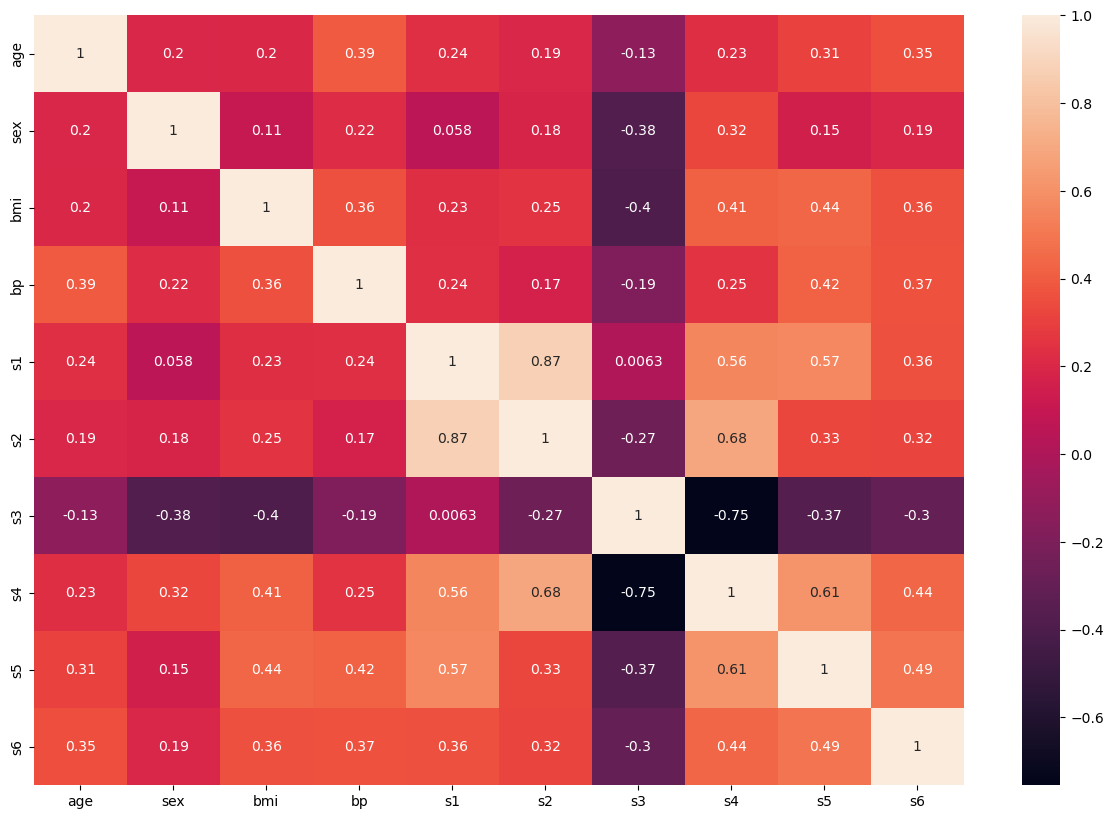

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True)

In [10]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

## Hyperparameter Tuning

In [11]:
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
    'max_features': ['sqrt', 'log2']
}

In [12]:
grid = GridSearchCV(estimator=tree_regressor, param_grid=params, cv=5, scoring='neg_mean_squared_error')

In [13]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [14]:
y_pred = grid.predict(X_test)

In [15]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [16]:
grid.best_score_

-3877.9661402541687

In [17]:
print(mean_squared_error(y_true=y_test, y_pred=y_pred))
print(r2_score(y_true=y_test, y_pred=y_pred))
print(mean_absolute_error(y_true=y_test, y_pred=y_pred))

4537.253322502241
0.2829505114345471
55.58832164872344


In [21]:
selectmodel = DecisionTreeRegressor(criterion='poisson', max_depth=4, max_features='log2', splitter='random')

In [22]:
selectmodel.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=4, max_features='log2',
                      splitter='random')

[Text(0.6041666666666666, 0.9, 'x[2] <= 0.08\npoisson = 18.919\nsamples = 309\nvalue = 152.738'),
 Text(0.3333333333333333, 0.7, 'x[8] <= 0.023\npoisson = 17.502\nsamples = 294\nvalue = 146.633'),
 Text(0.46875, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'x[2] <= -0.032\npoisson = 14.269\nsamples = 203\nvalue = 121.655'),
 Text(0.08333333333333333, 0.3, 'x[6] <= -0.058\npoisson = 9.01\nsamples = 73\nvalue = 97.89'),
 Text(0.041666666666666664, 0.1, 'poisson = 6.356\nsamples = 2\nvalue = 128.0'),
 Text(0.125, 0.1, 'poisson = 8.962\nsamples = 71\nvalue = 97.042'),
 Text(0.25, 0.3, 'x[3] <= 0.009\npoisson = 15.118\nsamples = 130\nvalue = 135.0'),
 Text(0.20833333333333334, 0.1, 'poisson = 12.238\nsamples = 83\nvalue = 122.446'),
 Text(0.2916666666666667, 0.1, 'poisson = 17.412\nsamples = 47\nvalue = 157.17'),
 Text(0.5, 0.5, 'x[3] <= 0.063\npoisson = 10.22\nsamples = 91\nvalue = 202.352'),
 Text(0.4166666666666667, 0.3, 'x[9] <= -0.031\npoisson = 10.358\nsamples = 79\nvalue = 195.519

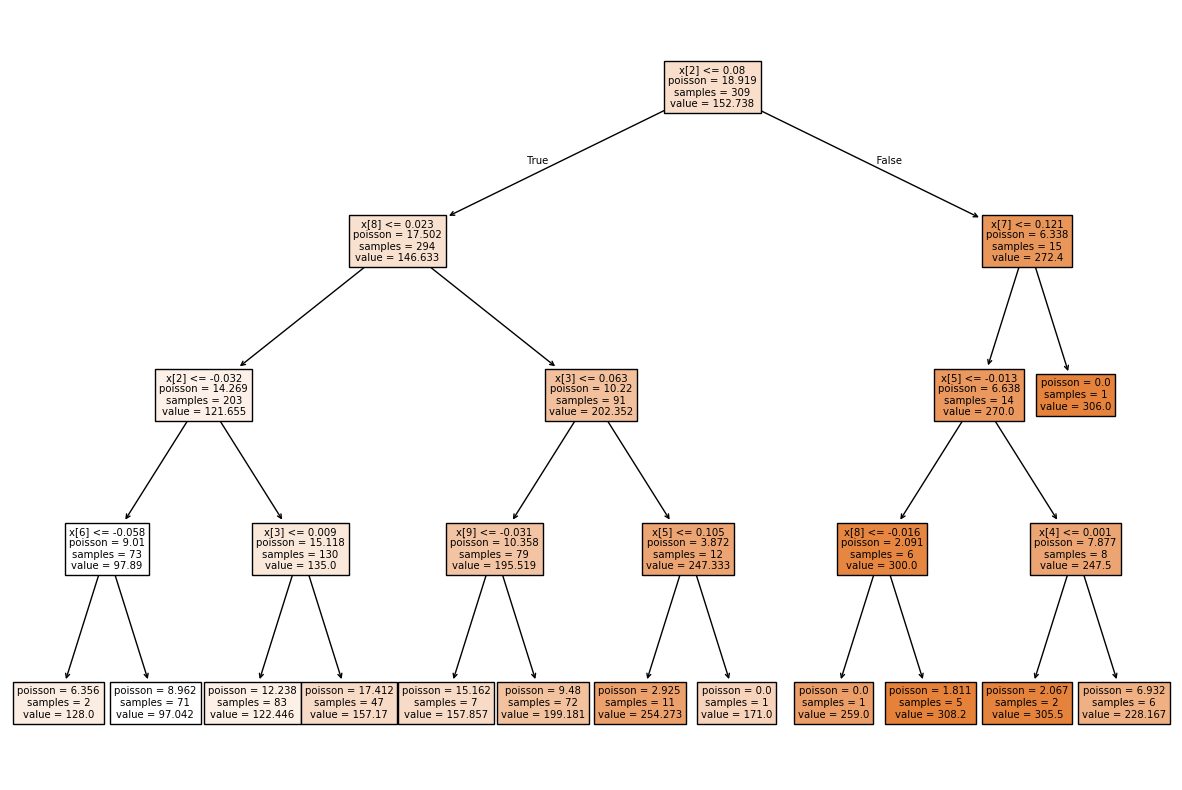

In [23]:
## Visualize the TREE
plt.figure(figsize=(15, 10))

tree.plot_tree(selectmodel, filled=True)